In [1]:
import pyaerocom as pya

#### Branch v090dev, version

In [12]:
pya.__version__

'0.9.0.dev1'

In [2]:
aeronet = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily', ['od550aer', 'ang4487aer'])
aeronet

Reading files 1-127 of 1265 (ReadAeronetSunV3) | 09:55:55 (delta = 0 s')
Reading file 0 of 1265 (ReadAeronetSunV3)
Reading files 127-253 of 1265 (ReadAeronetSunV3) | 09:56:04 (delta = 9 s')
Reading file 126 of 1265 (ReadAeronetSunV3)
Reading files 253-379 of 1265 (ReadAeronetSunV3) | 09:56:12 (delta = 7 s')
Reading file 252 of 1265 (ReadAeronetSunV3)
Reading files 379-505 of 1265 (ReadAeronetSunV3) | 09:56:15 (delta = 2 s')
Reading file 378 of 1265 (ReadAeronetSunV3)
Reading files 505-631 of 1265 (ReadAeronetSunV3) | 09:56:25 (delta = 9 s')
Reading file 504 of 1265 (ReadAeronetSunV3)
Reading files 631-757 of 1265 (ReadAeronetSunV3) | 09:56:35 (delta = 10 s')
Reading file 630 of 1265 (ReadAeronetSunV3)
Reading files 757-883 of 1265 (ReadAeronetSunV3) | 09:56:44 (delta = 8 s')
Reading file 756 of 1265 (ReadAeronetSunV3)
Reading files 883-1009 of 1265 (ReadAeronetSunV3) | 09:56:50 (delta = 6 s')
Reading file 882 of 1265 (ReadAeronetSunV3)
Reading files 1009-1135 of 1265 (ReadAeronetSunV3)

UngriddedData <networks: ['AeronetSunV3Lev2.daily']; vars: ['od550aer', 'ang4487aer']; instruments: ['sun_photometer'];No. of stations: 2530

/home/jonasg/miniconda3/envs/pya/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


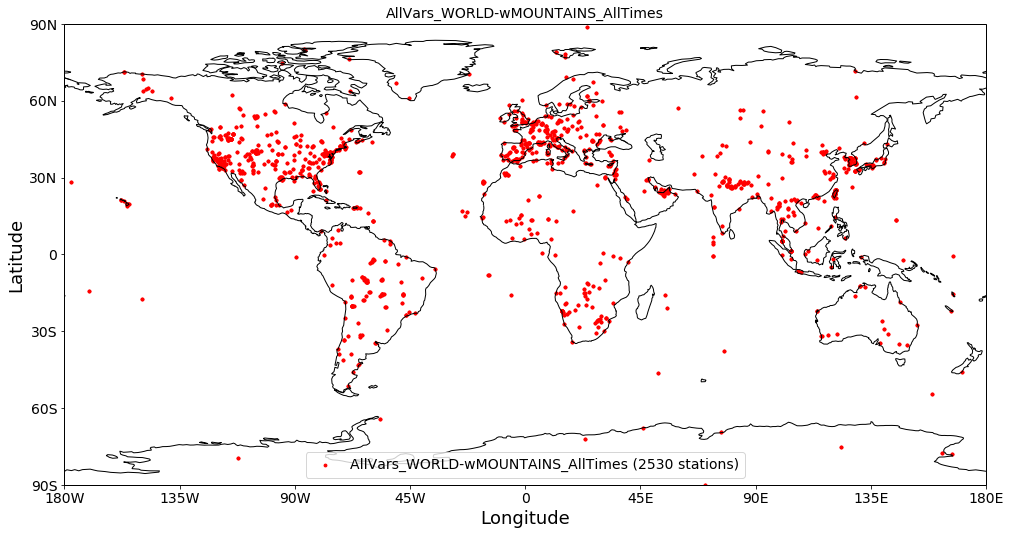

In [3]:
aeronet.plot_station_coordinates()

In [5]:
f1 = pya.Filter('NAMERICA')

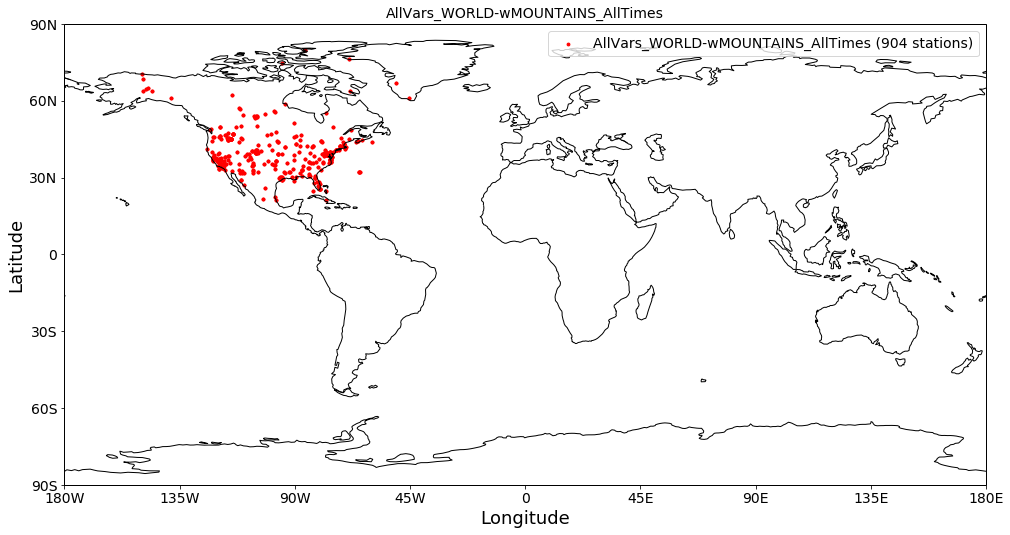

In [7]:
namerica_rect = f1(aeronet)
namerica_rect.plot_station_coordinates()

### BUG: this should also work with `filter_region` method of `UngriddedData`

In [33]:
try:
    aeronet.filter_region('NAMERICA')
    print('WOHOOOOOOOOOOOOOOOOOO')
except:
    from traceback import format_exc
    print('Oh NOOOOOOOOO')
    print(format_exc())

Oh NOOOOOOOOO
Traceback (most recent call last):
  File "<ipython-input-33-56f37ad36e9e>", line 2, in <module>
    aeronet.filter_region('NAMERICA')
  File "/home/jonasg/github/pya/pyaerocom/pyaerocom/ungriddeddata.py", line 1242, in filter_region
    mask = load_region_mask_xr(region_id=region_id)
  File "/home/jonasg/github/pya/pyaerocom/pyaerocom/land_sea_mask.py", line 49, in load_region_mask_xr
    raise ValueError("Not a valid region {}.".format(region_id))
ValueError: Not a valid region.



### NotImplemented (but should be): Filtering of multiple variables

In [14]:
f1 =  pya.Filter('NAMERICA-noMOUNTAINS-LAND')

In [17]:
try:
    f1(aeronet)
    print('WOHOOOOOOOOOOOOOOOOOO')
except:
    from traceback import format_exc
    print('Oh NOOOOOOOOO')
    print(format_exc())


Oh NOOOOOOOOO
Traceback (most recent call last):
  File "<ipython-input-17-cfb25e0a30f6>", line 2, in <module>
    f1(aeronet)
  File "/home/jonasg/github/pya/pyaerocom/pyaerocom/filter.py", line 300, in __call__
    return self.apply(data_obj)
  File "/home/jonasg/github/pya/pyaerocom/pyaerocom/filter.py", line 295, in apply
    data_obj = data_obj.filter_region(region_id=spl[-1])
  File "/home/jonasg/github/pya/pyaerocom/pyaerocom/ungriddeddata.py", line 1259, in filter_region
    "several variables. Current vars to retrieve {}".format(self.vars_to_retrieve))
NotImplementedError: Not filtering for ungridded data object containing several variables. Current vars to retrieve ['od550aer', 'ang4487aer']



## Check combined filters

First, get single variable data object.

In [18]:
data =  aeronet.extract_var('od550aer')
data

UngriddedData <networks: ['AeronetSunV3Lev2.daily']; vars: ['od550aer']; instruments: ['sun_photometer'];No. of stations: 1265

### BUG: Combined filtering does not work properly

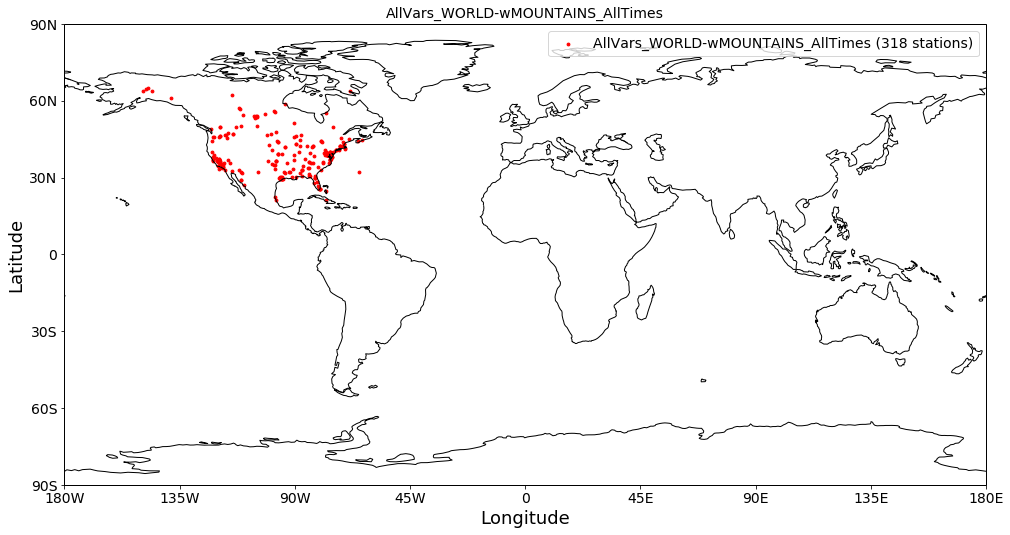

In [24]:
namerica_land = f1(data)
namerica_land.plot_station_coordinates()

This seems to have worked, even though the legend of the plot is misleading (cf. https://github.com/metno/pyaerocom/issues/76).

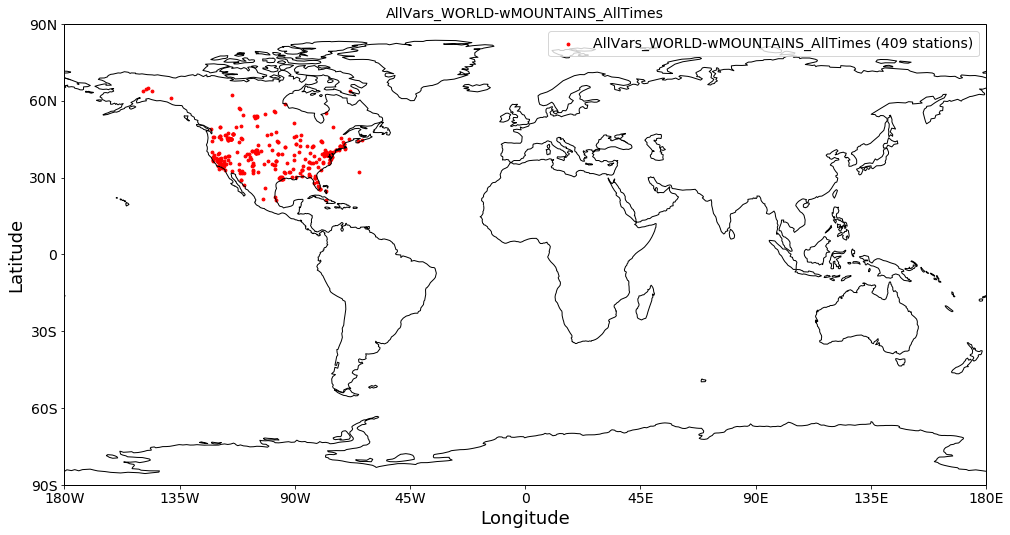

In [32]:
namerica_w_mountains = pya.Filter('NAMERICA-wMOUNTAINS-LAND')(data)
namerica_w_mountains.plot_station_coordinates()

In [21]:
f2 = pya.Filter('NAMERICA-noMOUNTAINS-OCN')

/home/jonasg/github/pya/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan


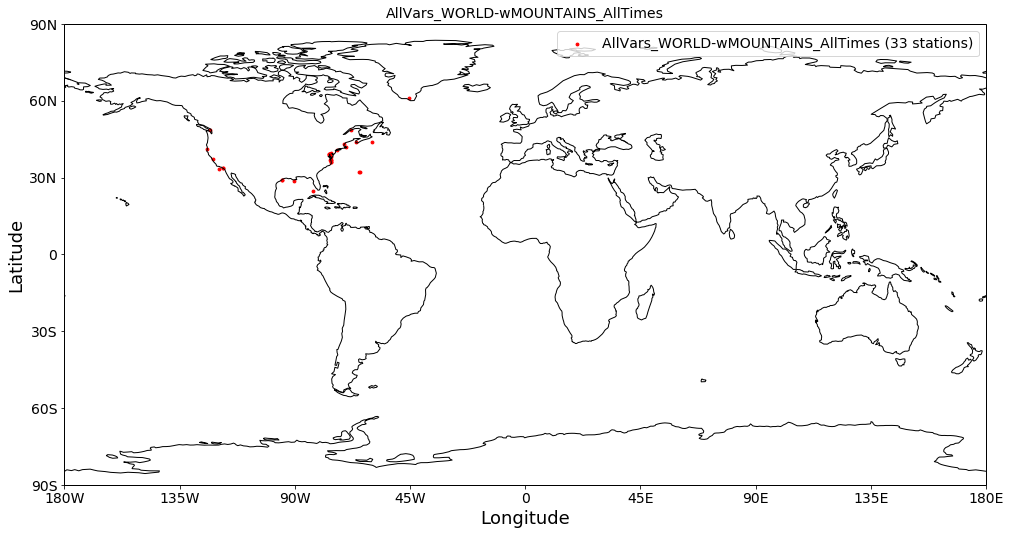

In [23]:
seaside_namerica = f2(data)
seaside_namerica.plot_station_coordinates()

This seems to be okay.

In [35]:
f3 = pya.Filter('LAND-noMOUNTAINS-LAND')
f3(data).plot_station_coordinates()

IndexError: list index out of range